# Digit Classifictation

Another classification example, classifying digits on the MNIST dataset

In [1]:
import nerve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing data.

There are 785 columns in this dataset, the first column says which digit the data belongs to i.e. 0-9, and the rest 784 columns are the values of the pixels of a 28x28 greyscale image ranging from 0-255

In [2]:
data = pd.read_csv('train.csv', nrows=20000)
labels = data.pop('label')

data = data/255 # scaling pixel values to 0-1
data = data.values # converting to numpy array
labels = labels.values.reshape(-1,1)
labels = nerve.utils.one_hot(labels)

In [3]:
data.shape, labels.shape

((20000, 784), (20000, 10))

### Creating a network

This ideally is an image classification problem and we can use convolution layers here, but MNIST 
is a simple data set and is known to be well fit just using simple shallow dense networks.

In [4]:
network = nerve.Network(layers=[
    nerve.layers.Input(784),
    nerve.layers.Dense(48),
    nerve.layers.Sigmoid(scale='auto'),  #0.05
    nerve.layers.Dense(10),
    nerve.layers.Softmax()
])
network

[1]Input(784)
[2]Dense(48)
[3]Sigmoid
[4]Dense(10)
[5]Softmax

In [5]:
loss = nerve.loss.rmse
optimizer = nerve.optimizers.GradientDescentOptimizer(1)
network.prepare(loss, optimizer, epochs=1000)

### Creating batches of data

***nerve*** also provides a data api which has convinient ways to make batches and perform minibatch training.

In [6]:
dataset = nerve.data.Dataset(data, labels)
batches = nerve.data.Batch(dataset, 1000)

### Train the network

CPU times: user 18min 55s, sys: 1min 20s, total: 20min 15s
Wall time: 10min 16s


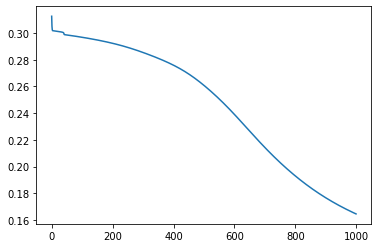

In [7]:
%%time
loss = network.train(batches)
plt.plot(loss)

### Calculate accuracy

In [8]:
predictions =  network(batches.data.X.T)
predictions = predictions.argmax(axis=0)
(predictions == batches.data.y.argmax(axis=1)).mean()

0.84835